# Titanic - Life and Death 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns


## Pull data into pandas Dataframe

In [11]:
dataset = pd.read_csv('../input/titanic/train.csv')

X = dataset.iloc[:, 2:]
y = dataset.iloc[:, 1:2]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


## Clean data

### Remove useless columns and impute missing values

In [12]:
X = X.drop(['Name'], axis = 1)
X = X.drop(['Ticket'], axis = 1)
#X = X.drop(['Cabin'], axis = 1)

X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

## Extract Deck level from Cabin numbers

In [13]:
import math

decks = []


for i in range(len(X)):
    value = X['Cabin'][i]
    if not pd.isnull(value) and value != 'T':
        # this is to deal with some strange data e.g. "F G63"
        if len(value) > 2 and value[1] == ' ':
            deck = value[2]
            decks.append(deck)
        else:
            # this is to handle the normal case
            deck = value[0]
            decks.append(deck)
    else:
        decks.append("")
        
decks = pd.DataFrame(decks, columns = ['Deck'])

X = pd.concat([X,decks],axis=1)

X = X.drop(['Cabin'], axis = 1)





In [16]:
X.head(25)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,male,22.000000,1,0,7.2500,S,
1,1,female,38.000000,1,0,71.2833,C,C
2,3,female,26.000000,0,0,7.9250,S,
3,1,female,35.000000,1,0,53.1000,S,C
4,3,male,35.000000,0,0,8.0500,S,
5,3,male,29.699118,0,0,8.4583,Q,
6,1,male,54.000000,0,0,51.8625,S,E
7,3,male,2.000000,3,1,21.0750,S,
8,3,female,27.000000,0,2,11.1333,S,
9,2,female,14.000000,1,0,30.0708,C,


## Encode categorical features

In [17]:
def oneHotEncoder(dataframe):
    
    categ = []

    for i in dataframe.columns:

      if dataframe[i].dtype == np.object:

        categ.append(i)

    df_final = dataframe
    
    i=0
    for field in categ:
        
        df1=pd.get_dummies(dataframe[field], drop_first = True)
        
        dataframe.drop([field],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final, df1],axis=1)
        i += 1
       
        
    df_final=pd.concat([dataframe,df_final],axis=1)
        
    return df_final

In [18]:
X2 = oneHotEncoder(X)

## Split off validation/test data

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 1)




## Feature scaling

In [20]:
## Feature Scaling

columns = X_train.columns

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(data=X_train, columns = columns)
X_test = pd.DataFrame(data=X_test, columns = columns)


"""
# input column numbers here, either normally distributed or not
normalDistCols = []
uniformDistCols = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']


for i in normalDistCols:
    
    sc = StandardScaler()
    X_train[:, i:i+1] = sc.fit_transform(X_train[:, i:i+1])
    X_test[:, i:i+1] = sc.transform(X_test[:, i:i+1])
    
    
    
for j in uniformDistCols:
    
    
    sc = MinMaxScaler(copy = False)
    X_train[[j]] = sc.fit_transform(X_train[[j]])
    X_test[[j]] = sc.transform(X_test[[j]])
    
"""
    
    

"\n# input column numbers here, either normally distributed or not\nnormalDistCols = []\nuniformDistCols = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']\n\n\nfor i in normalDistCols:\n    \n    sc = StandardScaler()\n    X_train[:, i:i+1] = sc.fit_transform(X_train[:, i:i+1])\n    X_test[:, i:i+1] = sc.transform(X_test[:, i:i+1])\n    \n    \n    \nfor j in uniformDistCols:\n    \n    \n    sc = MinMaxScaler(copy = False)\n    X_train[[j]] = sc.fit_transform(X_train[[j]])\n    X_test[[j]] = sc.transform(X_test[[j]])\n    \n"

## Sanity check :)

In [21]:
X_train.head(15)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,A,B,C,D,E,F,G
0,1.0,0.367921,0.25,0.000000,0.045381,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.371701,0.00,0.000000,0.111118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.421965,0.00,0.000000,0.020495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.5,0.258608,0.25,0.000000,0.143462,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.773813,0.00,0.000000,0.020495,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.359135,0.00,0.000000,0.412503,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.5,0.220910,0.00,0.000000,0.025374,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.367921,0.00,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.220910,0.25,0.333333,0.512122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.367921,0.00,0.000000,0.015127,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Build ANN and train on data

In [22]:
import tensorflow as tf


Epoch 1/20
23/23 [==============================] - 0s 9ms/step - loss: 0.7352 - val_loss: 0.6844
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6691 - val_loss: 0.6778
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.6631 - val_loss: 0.6777
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6624 - val_loss: 0.6771
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6623 - val_loss: 0.6763
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6612 - val_loss: 0.6764
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6604 - val_loss: 0.6761
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6598 - val_loss: 0.6744
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6588 - val_loss: 0.6724
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6578 - val_loss: 0.6734
Epoch 11/20
23/23 [

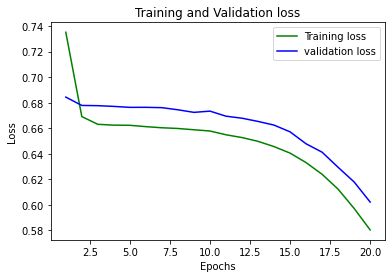

In [23]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 25, activation = 'sigmoid'))
ann.add(tf.keras.layers.Dense(units = 25, activation = 'sigmoid'))
ann.add(tf.keras.layers.Dense(units = 25, activation = 'sigmoid'))





ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

epochs = 20


history = ann.fit(X_train, y_train, batch_size = 32, epochs = epochs, validation_data=(X_test, y_test))

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochRange = range(1, epochs+1)
plt.plot(epochRange, loss_train, 'g', label='Training loss')
plt.plot(epochRange, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/4
23/23 [==============================] - 0s 5ms/step - loss: 0.5611 - val_loss: 0.5873
Epoch 2/4
23/23 [==============================] - 0s 2ms/step - loss: 0.5414 - val_loss: 0.5742
Epoch 3/4
23/23 [==============================] - 0s 2ms/step - loss: 0.5219 - val_loss: 0.5587
Epoch 4/4
23/23 [==============================] - 0s 2ms/step - loss: 0.5052 - val_loss: 0.5502


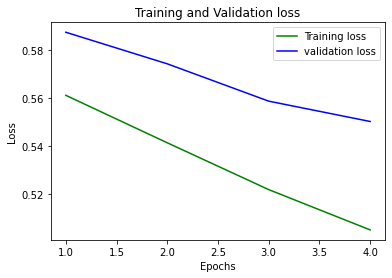

In [24]:
from keras import backend as K
K.set_value(ann.optimizer.learning_rate, 0.001)

epochs = 4


history = ann.fit(X_train, y_train, batch_size = 32, epochs = epochs, validation_data=(X_test, y_test))

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochRange = range(1, epochs+1)
plt.plot(epochRange, loss_train, 'g', label='Training loss')
plt.plot(epochRange, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Try XGBoost (Artificial Neural Networks not performing well enough)

In [25]:
import xgboost
xgbclassifier=xgboost.XGBClassifier()


#base_score=[0.25,0.5,0.75,1]

n_estimators = [200,250,300, 350]
max_depth = [2,3,4,5]
booster=['gbtree']
learning_rate=[0.01, 0.02, 0.03, 0.05]
min_child_weight=[2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster
    #'base_score':base_score
    }

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(xgbclassifier, 
                       hyperparameter_grid,
                       n_jobs = -1,
                       cv=5, 
                       scoring='accuracy', 
                       verbose = 5,
                       return_train_score=True)

grid_cv.fit(X_train, y_train)

print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(grid_cv.best_score_)



Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:   51.5s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'booster': 'gbtree', 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200}
0.849798089234709


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   57.7s finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Pull test data, apply preprocessing

In [26]:
test_dataset = pd.read_csv('../input/titanic/test.csv')

X = test_dataset.iloc[:,1:]

X = X.drop(['Name'], axis = 1)
X = X.drop(['Ticket'], axis = 1)
#X = X.drop(['Cabin'], axis = 1)

X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])


decks = []

for i in range(len(X)):
    value = X['Cabin'][i]
    if not pd.isnull(value) and value != 'T':
        # this is to deal with some strange data e.g. "F G63"
        if len(value) > 2 and value[1] == ' ':
            deck = value[2]
            decks.append(deck)
        else:
            # this is to handle the normal case
            deck = value[0]
            decks.append(deck)
    else:
        decks.append("")
        
decks = pd.DataFrame(decks, columns = ['Deck'])

X = pd.concat([X,decks],axis=1)

X = X.drop(['Cabin'], axis = 1)


X2 = oneHotEncoder(X)

X2 = sc.transform(X2)
X2 = pd.DataFrame(data=X2, columns = columns)


    

## Sanity check no.2

In [28]:
X2.head(15)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,A,B,C,D,E,F,G
0,1.0,0.428248,0.000,0.000000,0.015282,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.773813,0.000,0.000000,0.018909,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.334004,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.170646,0.000,0.000000,0.018006,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.371701,0.000,0.000000,0.014891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.5,0.321438,0.125,0.166667,0.056604,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.220910,0.000,0.000000,0.014110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.258608,0.250,0.000000,0.047138,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Predict Survival

In [29]:
y_pred = grid_cv.predict(X2)

# probabilities (if needed)
#y_pred_prob = ann.predict(X2)


## Final Sanity Check 

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Create Submission file

In [31]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('../input/titanic/gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('submission.csv',index=False)